# Plotnine

plotnie是在ggplot2的基础上发展而来。

官方网页：https://plotnine.readthedocs.io/en/latest/index.html

## 了解概念

Plotnine的基础是ggplot，所以，非常有必要对这个模块进行了解。

在另外一种进行数据分析的语言R中，有一个非常好用的绘图工具，名为ggplot2，显然这是现在的版本。R中有了ggplot2，对应着Python不能落伍，于是就有了ggplot模块，这个模块就是基于R的ggplot2以及相关绘图语法而来。

所以，还要先说一下ggplot2。

ggplot2是由Hadley Wickham创建的一个十分强大的可视化R包。ggplot2的绘图理念是：

Plot(图)= data(数据集)+ Aesthetics(美学映射)+ Geometry(几何对象)：

- data: 数据集，主要是data frame；
- Aesthetics: 美学映射，比如将变量映射给x,y坐标轴，或者映射给颜色、大小、形状等图形属性；
- Geometry: 几何对象，比如柱形图、直方图、散点图、线图、密度图等。

在ggplot2中有两个主要绘图函数：qplot()以及ggplot()。

- qplot(): 顾名思义，快速绘图；
- ggplot()：此函数才是ggplot2的精髓，远比qplot()强大，可以一步步绘制十分复杂的图形。

由ggplot2绘制出来的ggplot图可以作为一个变量，然后由print()显示出来。

ggplot2中有几个基本概念：

基本概念

- 图层（Layer）：如果用过photoshop，那么对于图层一定不会陌生。一个图层好比是一张玻璃纸，包含有各种图形元素，你可以分别建立图层然后叠放在一起，组合成图形的最终效果。图层可以允许用户一步步的构建图形，方便单独对图层进行修改、增加统计量、甚至改动数据。
- 标度（Scale）：标度是一种函数，它控制了数学空间到图形元素空间的映射。一组连续数据可以映射到X轴坐标，也可以映射到一组连续的渐变色彩。一组分类数据可以映射成为不同的形状，也可以映射成为不同的大小。
- 坐标系统（Coordinate）：坐标系统控制了图形的坐标轴并影响所有图形元素，最常用的是直角坐标轴，坐标轴可以进行变换以满足不同的需要，如对数坐标。其它可选的还有极坐标轴。
- 位面、组图、分面（Facet）：很多时候需要将数据按某种方法分组，分别进行绘图。facet就是控制分组绘图的方法和排列形式。（注意，将facet翻译为“位面”，有时候会造成误解，因为planes也翻译为“位面”）

这是R的ggplot2的概念，到Python的ggplot中，都继承了过来。

当Plotnine出来之后，继续继承这些概念。所以，在下面的Plotnine中，要用到这些概念。

## 坑爹的安装过程

通常的方法

```
pip install plotnine
```
or
```
conda install -c conda-forge plotnine
```

以上方法不一定能够顺利安装成功。特别是针对Python3.7的环境，应对建议如下：

- Pandas要先升级，顺便把Numpy也升级吧.

```
pip3 install --upgrade pandas
pip3 install --upgrade numpy
```

- 安装Cython
```
pip3 install cython
```  

- 安装最新的Pyproj。如果这个不安装或者不适应与python3.7，会爆出gcc错误。
```
pip3 install git+https://github.com/jswhit/pyproj.git#egg=pyproj
```  
建议clone源码安装

- 如果geppandas没有安装，也要安装
```
pip3 install geopandas
```  
- 最后安装plotnine
```
pip3 install 'plotnine[all]'
```
经历以上过程之后，如果还没有安装好，就只能google了。

## 初步体验

In [1]:
import pandas as pd
import numpy as np

from plotnine import *

from plotnine.data import *   #引入自带的数据集

#使用plotnine自带的一个关于汽车的数据集，mpg
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


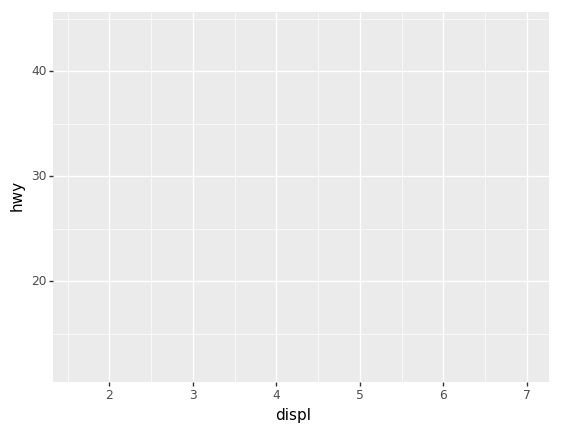

<ggplot: (-9223372036558788604)>

In [2]:
# 用到的三个变量分别是发动机排气量(displ)、高速公路上的每加仑行驶里数(hwy)、汽缸数目(cyl)。

(ggplot(mpg, aes('displ', 'hwy', color='factor(cyl)')))    

#数据集：mpg
#Aesthetics(美学映射)：aes参数，它将displ映射到X轴，将hwy映射到Y轴，将cyl变为分类数据后映射为不同的颜色。
#Geometry(几何对象)：上面没有说明，所以就画不出具体的图像

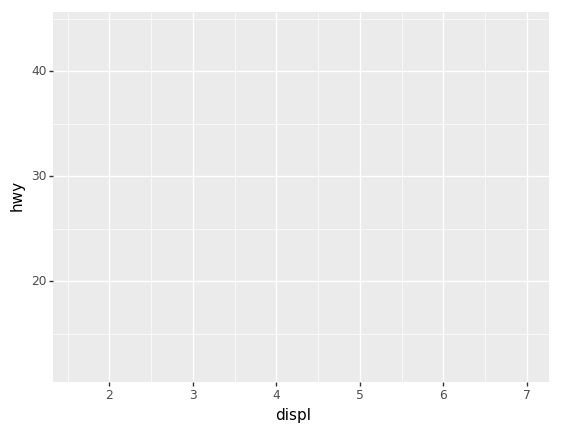

<ggplot: (297193455)>

In [3]:
# 还可以写成如下形式
(ggplot(mpg)    #加载数据
 + aes(x='displ', y='hwy', color='factor(cyl)')    #美学映射，这里用+表示增加一个图层，当然这个图层可以理解为最基础的
)

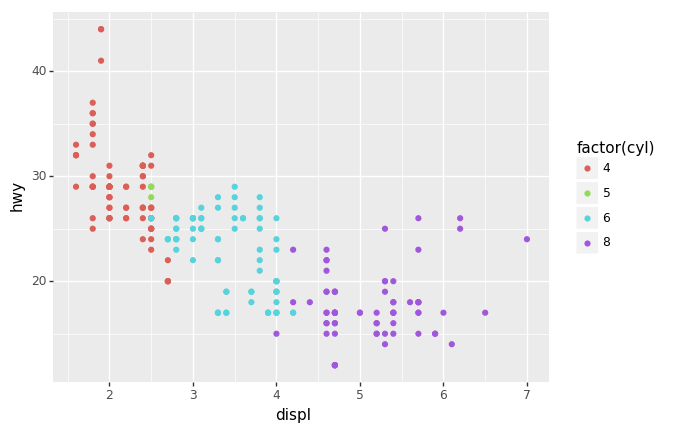

<ggplot: (297193413)>

In [4]:
(ggplot(mpg)    #加载数据
 + aes(x='displ', y='hwy', color='factor(cyl)')    #美学映射，这里用+表示增加一个图层，当然这个图层可以理解为最基础的
 + geom_point()    #new. 此处增加一个图层，即Geometry，几何对象
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


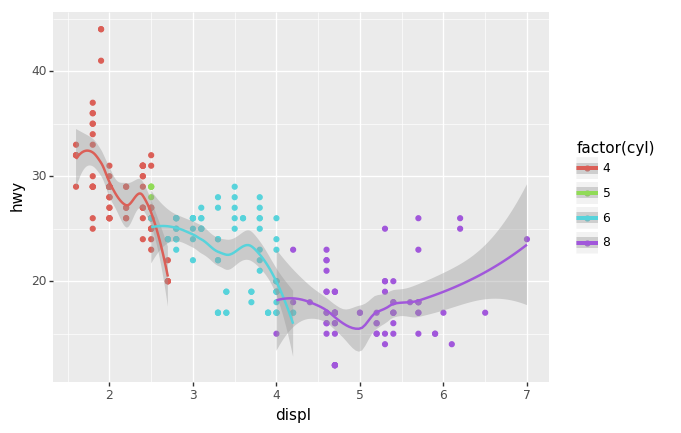

<ggplot: (296373610)>

In [5]:
(ggplot(mpg)    #加载数据
 + aes(x='displ', y='hwy', color='factor(cyl)')    #美学映射，这里用+表示增加一个图层，当然这个图层可以理解为最基础的
 + geom_point()    #此处增加一个图层，表示绘制散点图
 + geom_smooth()    #new. 后面两个图层的函数，与R中的完全一样
)

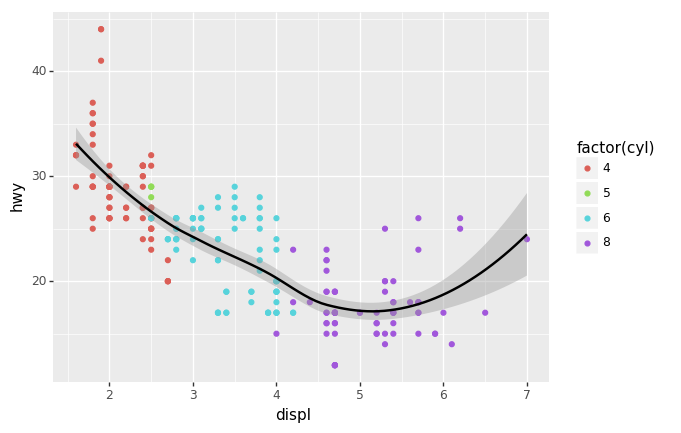

<ggplot: (296171142)>

In [6]:
# 在上图中，aes()中的颜色也适用于geom_smooth()绘制的平滑曲线，如果想让颜色只用于geom_point()层，可以这样做

(ggplot(mpg)
 + aes('displ', 'hwy')
 + geom_point(aes(color='factor(cyl)'))
 + geom_smooth()
)

In [7]:
import pandas as pd
reviews = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/winemag/winemag.csv", index_col=0)    #注意index_col，将第0列作为索引
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/winemag/winemag.csv").head()    #与上面的比较

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
top_wines = reviews[reviews['variety'].isin(reviews['variety'].value_counts().head(5).index)] 
# 注意了解isin方法
top_wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont


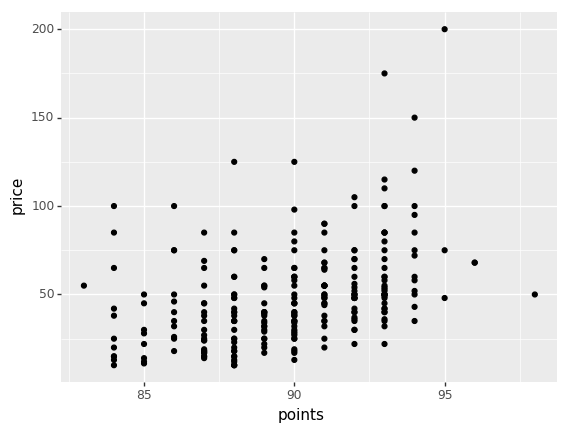

<ggplot: (313898181)>

In [10]:
from plotnine import *
# 取部分数值，并且删除有缺失数据的实例
df = top_wines.head(1000).dropna()

(ggplot(df)    #加载数据
+ aes('points', 'price')     # 美学映射 
+ geom_point())    # 几何图形



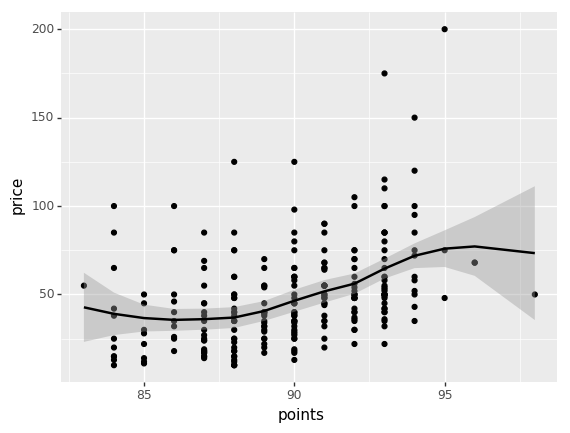

<ggplot: (313902512)>

In [11]:
df = top_wines.head(1000).dropna()

(ggplot(df)                  #加载数据
+ aes('points', 'price')     # 美学映射
+ geom_point()               # 几何图形
+ stat_smooth()              # new
) 

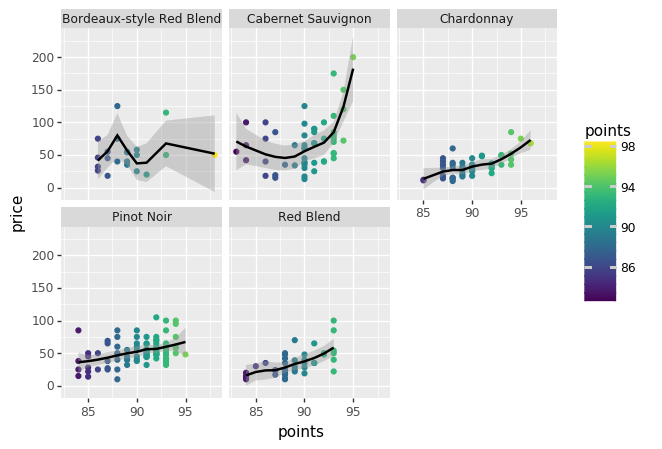

<ggplot: (-9223372036581865945)>

In [12]:
# 利用facet_wrap()设置子图。可以对比前面在seaborn中创建子图的方式
df = top_wines.head(1000).dropna()

(
    ggplot(df)                  #加载数据
    + aes(color='points')
    + aes('points', 'price')
    + geom_point()          
    + stat_smooth()
    + facet_wrap("variety")    #facet_warp("~variety")
)  

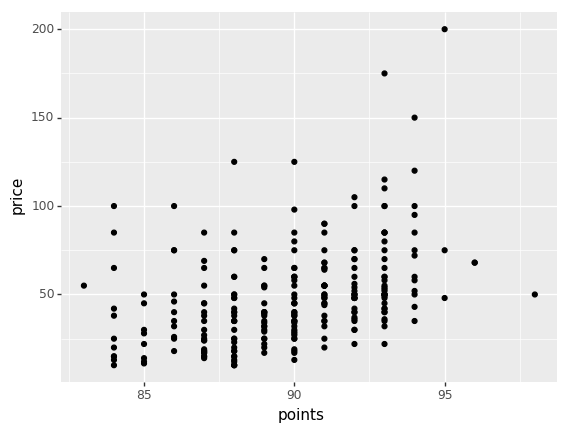

<ggplot: (301272696)>

In [13]:
#另外，在写法上可以有一些变换。比如以下两种写法，与上面的写法等效
(ggplot(df, aes('points', 'price'))
 + geom_point()
)

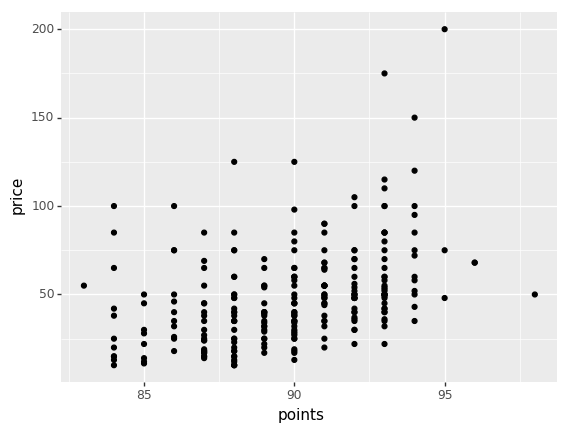

<ggplot: (301272724)>

In [14]:
(ggplot(df)
+ geom_point(aes('points', 'price'))
)

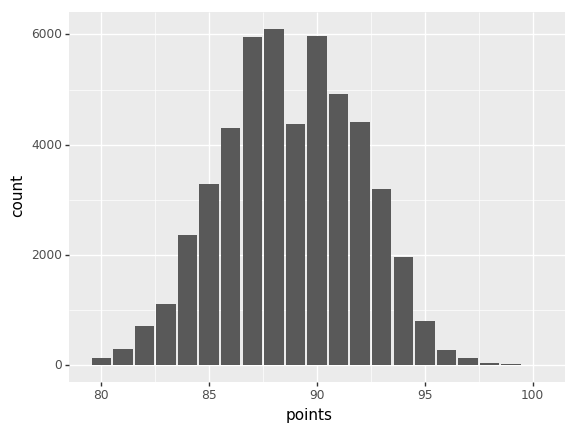

<ggplot: (305198312)>

In [15]:
# 绘制柱形图
(ggplot(top_wines)
     + aes('points')
     + geom_bar()
)

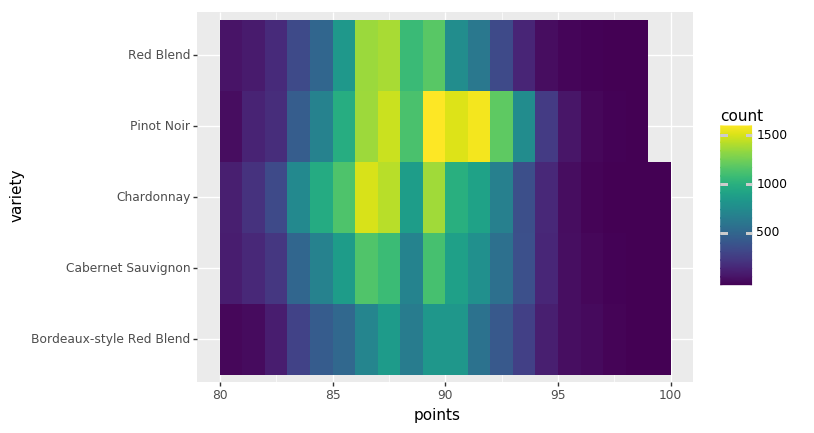

<ggplot: (304580465)>

In [16]:
(ggplot(top_wines)
     + aes('points', 'variety')
     + geom_bin2d(bins=20)
)

## 案例：绘制元素周期表

In [17]:
import pandas as pd
import numpy as np

from plotnine import *

%matplotlib inline

elements = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/elemanets/elements.csv")
elements.head()

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,...,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,...,0.0,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,...,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,...,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2


In [18]:
#增加一些类型信息，便于后续使用，可以看做数据整理
elements['group'] = [-1 if g == '-' else int(g) for g in elements.group]
elements['bonding type'] = elements['bonding type'].astype('category')
elements['metal'] = elements['metal'].astype('category')
elements['atomic_number'] = elements['atomic number'].astype(str)
elements.head(10)



,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period,atomic_number
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,...,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,...,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1,2
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2,3
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,...,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2,4
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,...,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2,5
5,6,C,Carbon,12.0107,#909090,[He] 2s2 2p2,2.55,77.0,16 (+4),170.0,...,solid,covalent network,3823.0,4300.0,2.26000,nonmetal,Ancient,14,2,6
6,7,N,Nitrogen,14.0067,#3050F8,[He] 2s2 2p3,3.04,75.0,146 (-3),155.0,...,gas,diatomic,63.0,77.0,0.00000,nonmetal,1772,15,2,7
7,8,O,Oxygen,15.9994,#FF0D0D,[He] 2s2 2p4,3.44,73.0,140 (-2),152.0,...,gas,diatomic,55.0,90.0,0.00000,nonmetal,1774,16,2,8
8,9,F,Fluorine,18.9984032,#90E050,[He] 2s2 2p5,3.98,71.0,133 (-1),147.0,...,gas,atomic,54.0,85.0,0.00000,halogen,1670,17,2,9
9,10,Ne,Neon,20.1797,#B3E3F5,[He] 2s2 2p6,NaN,69.0,NaN,154.0,...,gas,atomic,25.0,27.0,0.00000,noble gas,1898,18,2,10


In [19]:
top = elements.query('group != -1').copy()
bottom = elements.query('group == -1').copy()
top['x'] = top.group    
top['y'] = top.period
nrows = 2
hshift = 3.5
vshift = 3
bottom['x'] = np.tile(np.arange(len(bottom)//nrows), nrows) + hshift
bottom['y'] = bottom.period + vshift
tile_width = 0.95
tile_height = 0.95

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


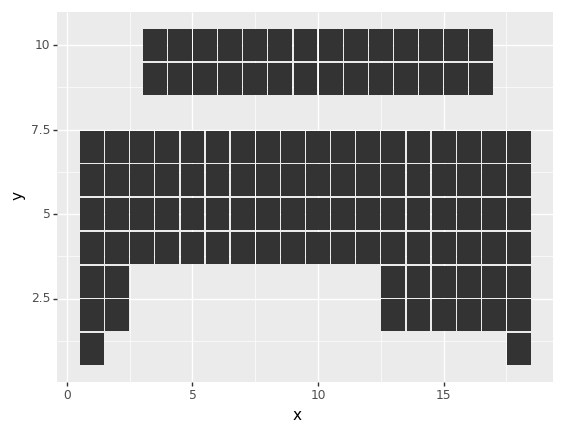

<ggplot: (296315954)>

In [20]:
(ggplot(aes('x', 'y'))    #根据x, y设置整体的图表大小
 + geom_tile(top, aes(width=tile_width, height=tile_height))    #设置下图中黑色图表，tile具有将小块平铺的含义
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


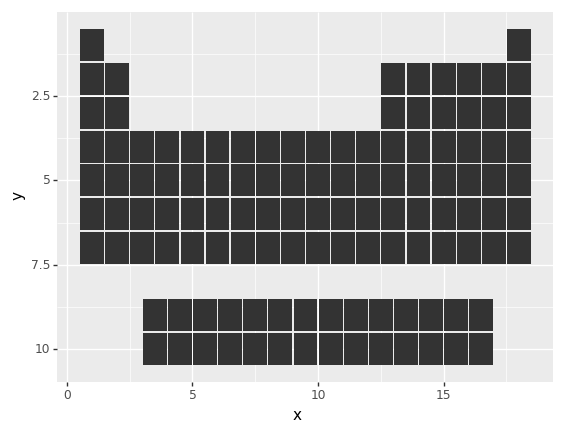

<ggplot: (-9223372036558609404)>

In [21]:
(ggplot(aes('x', 'y'))
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + scale_y_reverse() # 在y轴方向上反序
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


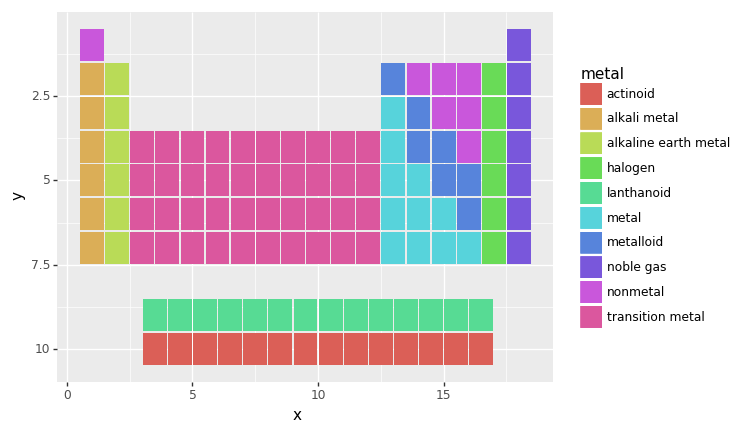

<ggplot: (296372712)>

In [22]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')  # 利用metal中的类别，使用默认色彩填充不同块的色彩
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + scale_y_reverse()
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


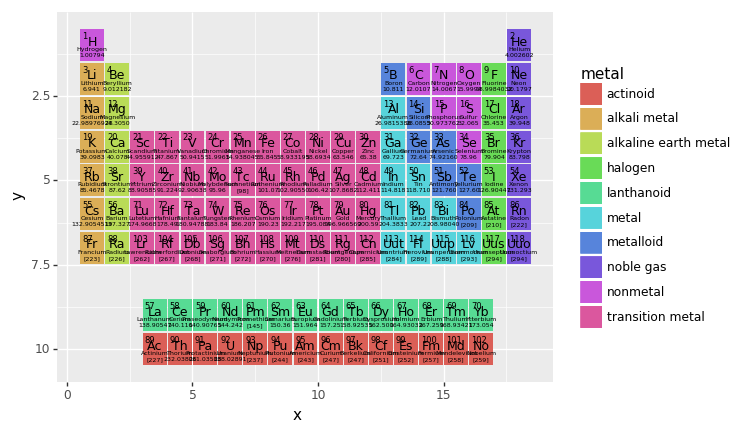

<ggplot: (-9223372036558441654)>

In [23]:
#为每个小方块中增加文字，包含元素名称，原子量、原子序数等
def inner_text(data):
    layers = [geom_text(data, aes(label='atomic_number'), nudge_x=-0.40, nudge_y=0.40,
                        ha='left', va='top', fontweight='normal', size=6),
              geom_text(data, aes(label='symbol'), nudge_y=.1, size=9),
              geom_text(data, aes(label='name'), nudge_y=-0.125, fontweight='normal', size=4.5),
              geom_text(data, aes(label='atomic mass'), nudge_y=-.3, fontweight='normal', size=4.5)]
    return layers

(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)    # new
 + inner_text(bottom) # new
 + scale_y_reverse()
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


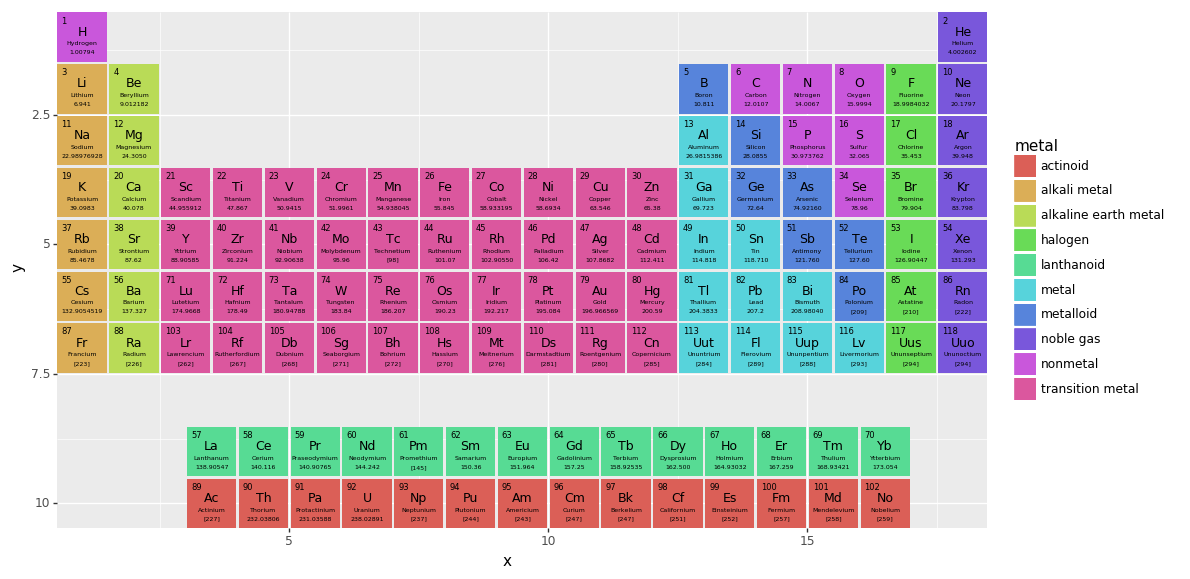

<ggplot: (-9223372036550189266)>

In [24]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + coord_equal(expand=False)   # new 对展示效果进行修改
 + theme(figure_size=(12, 6))  # new
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pl

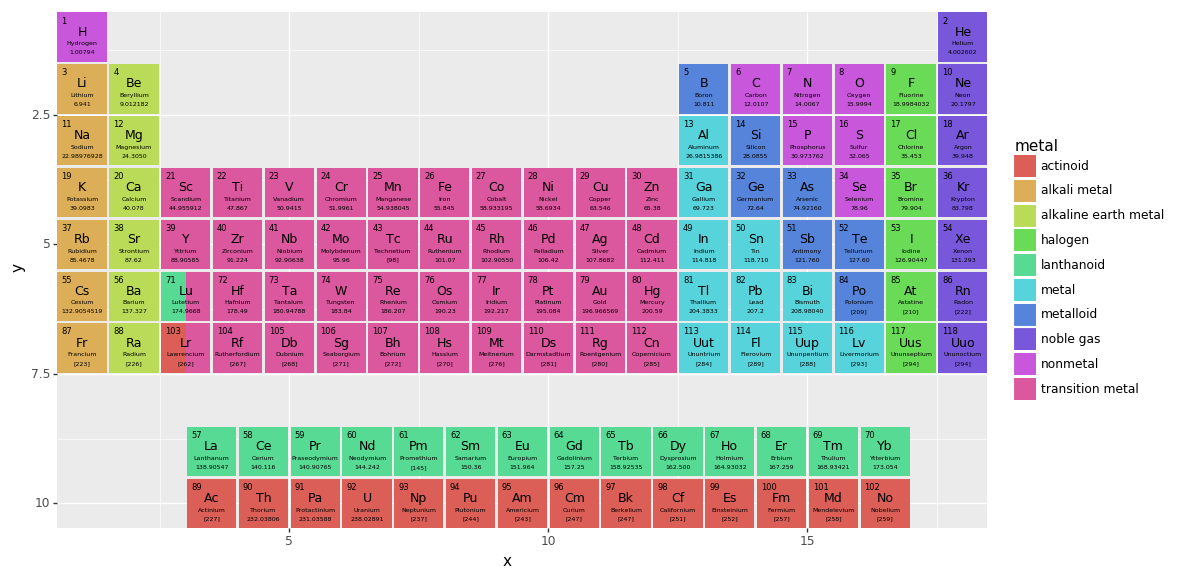

<ggplot: (-9223372036550201614)>

In [25]:
# 注意，在元素周期表中，镧系元素和锕系元素比较特殊，所以创建一个数据集，专门覆盖这个图层。
# 创造一个数据集，用此数据集作为一个新的层，
split_df = pd.DataFrame({
    'x': 3-tile_width/4,
    'y': [6, 7],
    'metal': pd.Categorical(['lanthanoid', 'actinoid'])
})

(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))  # 在原来的镧系元素和锕系元素位置新增加了一个图层，对比上面的图示
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + coord_equal(expand=False)
 + theme(figure_size=(12, 6))
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pl

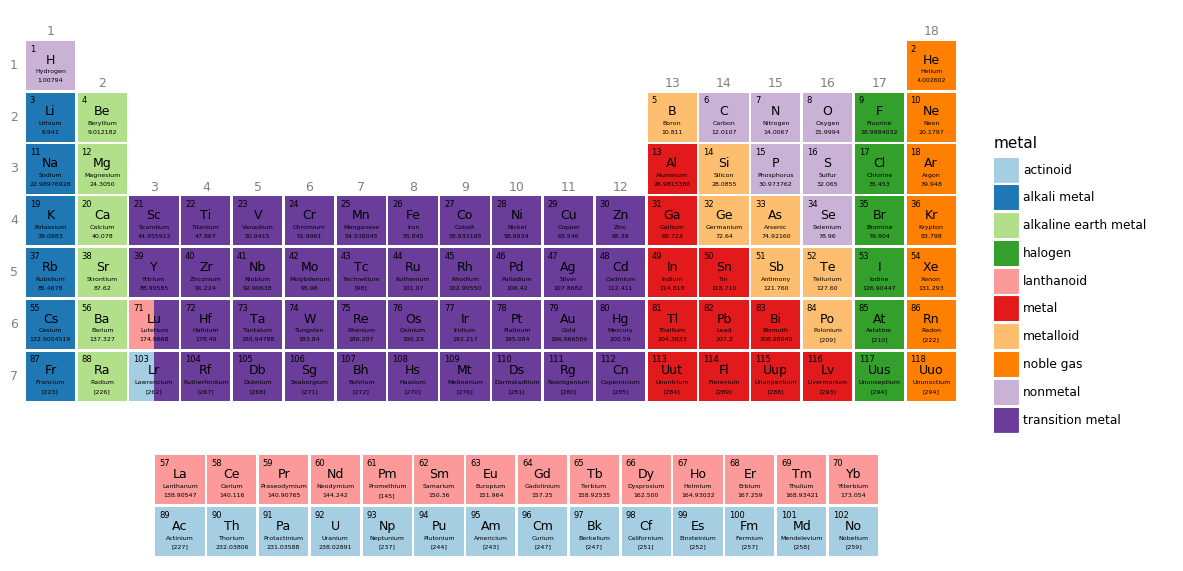

<ggplot: (297194546)>

In [26]:
#标记周期（行）和族（group, 列）
groupdf = pd.DataFrame({
    'group': range(1, 19),
    'y': np.repeat([1, 2, 4, 2, 1], [1, 1, 10, 5, 1])})

(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + geom_text(groupdf, aes('group', 'y', label='group'), color='gray', nudge_y=.525,
             va='bottom',fontweight='normal', size=9, inherit_aes=False)    # new
 + scale_y_reverse(breaks=range(1, 8), limits=(0, 10.5))                    # modified
 + scale_fill_brewer(type='qual', palette=3)
 + coord_equal(expand=False)
 + theme_void()
 + theme(figure_size=(12, 6),
         plot_background=element_rect(fill='white'),
         axis_text_y=element_text(margin={'r': 5}, color='gray', size=9)    # new
         )
)

# Plotly

Plotly的底层是plotly.js，plotly.js基于D3.js、stack.gl和SVG，能够用JS在网页上实现类似MATLAB和Matplotlib的图形。

Plotly提供Python、MATLAB、R的api.

网站：https://plot.ly/

原本是收费的上而言软件，但自2016年6月开始，提供免费的社区办。

为了实现在线发布绘图结果，要在官方网站注册，例如我的账号是:qiwsir(qiwsir@gmail.com）

登录网站之后，在右上角用户名的下拉菜单张选择“setting”项目，然后再左侧栏选择“API Keys”，设置Username和API KEY，并记录下来：

然后完成在线初始化，按照如下操作：



In [27]:
import plotly
plotly.tools.set_credentials_file(username="yourname", api_key='yourkey')

In [28]:
import plotly.plotly as py
from plotly.graph_objs import *

t0 = Scatter(
    x = [1, 2, 3, 4],
    y = [10, 15, 13, 17]
    )
t1 = Scatter(
    x = [1, 2, 3, 4],
    y = [16, 18, 13, 17]
    )

data = [t0, t1]
py.plot(data, filename="laoqi_first_image")   

'https://plot.ly/~qiwsir/8'

In [29]:
#将图嵌入到当前浏览器，但是速度有点慢。
py.iplot(data, filename="laoqi_second_image")  

In [30]:
#使用离线模式
import plotly
import plotly.graph_objs as go

plotly.offline.plot({
    "data": [go.Scatter(x=[1,2,3,4], y=[6,7,8,9])],
    "layout": go.Layout(title="laoqi_third_image")
}, auto_open = True)


#会自动生成一个html文件，并默认把该文件保存在当前工作目录中。

'file:///Users/qiwsir/Documents/Codes/soochow_lessons/temp-plot.html'

In [31]:
#可以把生成的图示直接插入到下面的位置
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})

## 案例：学校就业数据分析

In [32]:
import plotly
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/school/school.csv")
df.head()

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47


In [33]:
#在本地创建一个表格
table = ff.create_table(df)
plotly.offline.iplot(table, filename="jupyter table1")

In [34]:
#柱形图
import plotly.graph_objs as go

data = [go.Bar(x=df.School, y=df.Gap)]
plotly.offline.iplot(data, filename="bar image")

In [35]:
women = go.Bar(x=df.School, y=df.Women, name="Women", marker=dict(color='#ffcdd2'))
men = go.Bar(x=df.School, y=df.Men, name="Men", marker=dict(color="#A2D5F2"))
gap = go.Bar(x=df.School, y=df.Gap, name='Gap', marker=dict(color="#59606D"))
data = [women, men, gap]
layout = go.Layout(title="Average Earnings for Graduates", xaxis=dict(title="School"), yaxis=dict(title="Salary (in thousands)"))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename="bar image 2")

## 用plotly实现地理信息可视化

plotly整合了Mapbox（https://www.mapbox.com/），从而它也具有了很好的地图功能，实现地理信息的可视化。

因为使用的是mapbox，所以需要在mapbox上注册，并获取相应的token

In [36]:
import plotly
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/jiangsu/city_population.csv")

mapbox_token = "yourtoken"

lat = df.latd    #经度(Longitude) 纬度(Latitude)
lon = df.longd
locations_name = df.name

data = [
    go.Scattermapbox(
        lat = lat,
        lon = lon,
        mode = "markers",
        marker = dict(size=17, color='rgb(255, 0, 0)', opacity=0.7),    #opacity = 0.7,    不透明值
        text = locations_name,
        hoverinfo = 'text',
    ),
    go.Scattermapbox(
        lat = lat,
        lon = lon,
        mode = "markers",
        marker = dict(size=8, color='rgb(242, 177, 172)', opacity=0.7),
        text = locations_name,
        hoverinfo = 'text'
    )
]

layout = go.Layout(
    title = "The City of Jiangsu",
    autosize = True,
    hovermode = "closest",
    showlegend = False,
    mapbox = dict(accesstoken=mapbox_token, bearing=0, center=dict(lat=32,lon=118),pitch=0,zoom=3,style='light'),
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig, filename="jiagnsu_city_map")

## 金融绘图

金融绘图，是plotly不得不介绍的，因为它的某些函数，相对这方面做了专门优化，非常好用。



In [37]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go

appl_df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/appl/appl.csv", index_col=['date'], parse_dates=['date'])
appl_df.head()

,close,volume,open,high,low
date,,,,,
2018-10-17,221.19,22692880,222.30,222.64,219.3400
2018-10-16,222.15,28802550,218.93,222.99,216.7627
2018-10-15,217.36,30280450,221.16,221.83,217.2700
2018-10-12,222.11,39494770,220.42,222.88,216.8400
2018-10-11,214.45,52902320,214.52,219.50,212.3200


In [38]:
#绘制OHLC图（美国线）
import plotly
import plotly.graph_objs as go

trace = go.Ohlc(
    x = appl_df.index,
    open = appl_df.open,
    high = appl_df.high,
    low = appl_df.low,
    close = appl_df.close,
)

plotly.offline.iplot([trace])
#数据太多，看不清楚，可以用下面的方式
#plotly.offline.plot([trace], filename='./appl_ohlc.html')



In [39]:
#取出部分数据绘图
df = appl_df.head(30)
import plotly
import plotly.graph_objs as go

trace = go.Ohlc(
    x = df.index,
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
)

plotly.offline.iplot([trace])

In [40]:
#绘制蜡烛图
import plotly
import plotly.graph_objs as go

trace = go.Candlestick(    #只需修改函数名称
    x = df.index,
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
)

plotly.offline.iplot([trace])

In [41]:
#上述绘图中，横坐标是实践，但是，不是每天都有交易，周六周日所对应日期没有交易。
#因此，需要对图像进行优化。
df = appl_df.head(50)

trace = go.Candlestick(
    x = df.index,
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
)


layout =go.Layout(
    xaxis = dict(
        autorange = True,
        mirror = 'all',
        gridcolor = 'rgb(180, 180, 180)',
        showline = True, #显示x轴
        showgrid = True,
        tickangle = -60,
        categoryorder = 'category ascending',   #对x轴的分类元素进行升序排序。默认trace，即以df.index进行排序。降序：category descending
        type = 'category',    #把x轴的元素课程分类的元素.元素的属性为类别，不是时间，没有交易就不显示
    ),
    yaxis = dict(
        autorange = True,
        gridcolor = '#3d3d4f',
    )
)

fig = go.Figure(data=[trace], layout=layout)
plotly.offline.iplot(fig)

In [42]:
#在上图基础上，再增加5日均线
df = appl_df.head(50)
df['avg_5'] = df['close'].rolling(5).mean()    #计算5日收盘价的平均值，即五日平均价

trace = go.Candlestick(
    x = df.index,
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
)

#增加5日线
five_line = go.Scatter(
    x = df.index,
    y = df.avg_5,
    name = '5 days mean',
    line = dict(color='black')
)


layout =go.Layout(
    xaxis = dict(
        autorange = True,
        mirror = 'all',
        gridcolor = 'rgb(180, 180, 180)',
        showline = True, #显示x轴
        showgrid = True,
        tickangle = -60,
        categoryorder = 'category ascending',   #对x轴的分类元素进行升序排序。默认trace，即以df.index进行排序。降序：category descending
        type = 'category',    #把x轴的元素课程分类的元素.元素的属性为类别，不是时间，没有交易就不显示
    ),
    yaxis = dict(
        autorange = True,
        gridcolor = '#3d3d4f',
    )
)

fig = go.Figure(data=[trace, five_line], layout=layout)
plotly.offline.iplot(fig)

# Pyecharts

很多模块都可以实现地理信息可视化，比如maptlotlib所包含的basemap等。

下面要介绍的是一个基于中文的，而且使用简单，渲染漂亮的模块：pyecharts

官网：http://pyecharts.org/#/zh-cn/prepare

难得有中文文档，因为echart就是国产的，目前被互联网公司广泛使用

## 基本应用

为了获得更好的效果，还要安装如下依赖：

- 安装 Nodejs 环境：https://nodejs.org/en/download/
- 安装 phantomjs： 

```
$ sudo npm install -g phantomjs-prebuilt --upgrade --unsafe-perm
```
- 安装 pyecharts-snapshot： 
```
$ pip install pyecharts-snapshot
```

主题插件：
```
pip install echarts-themes-pypkg
```



In [43]:
from pyecharts import Bar

bar = Bar("我的第一个图表", "双十一的商品")
bar.add("服装", 
        ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"], 
        [5, 20, 36, 10, 75, 90], is_more_utils=True)

bar.render()    # 生成本地 HTML 文件，模式在当前工作目录，可以用路径指定保存位置bar.render("./images/render.html")
#bar    #在下面显示

In [44]:
from pyecharts import Bar

bar = Bar("我的第一个图表", "双十一的商品")
bar.use_theme('dark')    #更换主题颜色
bar.add("服装", ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"], [5, 20, 36, 10, 75, 90], is_more_utils=True)

bar

In [45]:
from pyecharts import Bar

months = ["{}月".format(i) for i in range(1, 9)]
cpi = [101.5, 102.9, 102.1, 101.8, 101.8, 101.9, 102.1, 102.3]
food = [99.5, 104.4, 102.1, 100.7, 100.1, 100.3, 100.5, 101.7]
bar = Bar("柱形图")
bar.add("居民消费指数", months, cpi, mark_line = ['average'], mark_point = ['max', 'min'])
bar.add("食品消费指数", months, food, mark_line = ['average'], mark_point = ['max', 'min'])
bar

In [46]:
#饼状图
from pyecharts import Pie
pro = ["衬衫", "羊毛衫", "外套", "裤子", "运动鞋", "袜子"]
shop1 = [11, 23, 12, 67, 32, 10]
shop2 = [67, 34, 21, 9, 18, 22]
pie = Pie("饼状图", title_pos = "center", width = 900)
pie.add("Shop A", pro, shop1, is_random=True, radius=[50, 75], rosetype='radius')
#pie.add("Shop B", pro, shop2, is_random=True, radius=[30, 75], rosetype='area', is_legend_show=False, is_label_show=True)
pie



In [47]:
#在同一个坐标写中绘制多种类型的图示
from pyecharts import Bar, Line, Overlap

pro = ["A", "B", "C", "D", "E", "F"]
value1 = [10, 20, 30, 40, 50, 60]
value2 = [37, 27, 47, 41, 57, 77]

bar = Bar("柱形图-折线图")
bar.add("柱形图", pro, value1)
line = Line()
line.add("折线图", pro, value2)

overlap = Overlap()
overlap.add(bar)
overlap.add(line)

overlap

## 地理信息可视化

绘制PM2.5分布
```
pip3 install echarts-countries-pypkg
```

注意，配置好之后，要重启jupyter

In [48]:
import pandas as pd
df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/pm25/pm2.csv")
df.dtypes

RANK             int64
CITY_ID          int64
CITY_NAME       object
Exposed days     int64
dtype: object

In [49]:
#scatter连续型
city = df['CITY_NAME']
value = df['Exposed days']

from pyecharts import Geo

geo = Geo("主要城市空气质量", "pm2.5", title_color = "#fff", title_pos = "center", width=1200, height=600, background_color = "#404a59")
geo.add("PM2.5", city, value, visual_range=[0, 300], visual_text_color='#fff', symbol_size=16, is_visualmap=True)
geo.render()

In [50]:
#scatter分段型
geo = Geo("主要城市空气质量", "pm2.5", title_color = "#fff", title_pos = "center", width=1200, height=600, background_color = "#404a59")
geo.add('PM2.5', city, value, visual_range=[0, 300], visual_text_color='#fff', symbol_size=16, is_visualmap=True, is_piecewise=True, visual_split_number=6)
geo.render()

In [51]:
#热图
geo = Geo("主要城市空气质量", "pm2.5", title_color = "#fff", title_pos = "center", width=1200, height=600, background_color = "#404a59")
geo.add('PM2.5', city, value, visual_range=[0, 300], visual_text_color='#fff', type="heatmap", is_visualmap=True)
geo.render()

In [52]:
#effectscatter类型
# 选择部分城市数据
city_name = ['哈尔滨', "沈阳", "唐山", "青岛", "石家庄", "徐州", "南京", "上海", "温州", "福州", "广州", "昆明", "成都", "拉萨"]
top = df[df['CITY_NAME'].isin(city_name)]
top

,RANK,CITY_ID,CITY_NAME,Exposed days
0,1,594,拉萨,2
6,7,575,昆明,11
8,9,260,福州,15
38,43,213,温州,48
66,74,455,广州,65
103,115,307,青岛,87
108,120,167,上海,88
143,160,78,沈阳,108
153,175,137,哈尔滨,115
188,211,168,南京,138


In [53]:
geo = Geo("典型城市空气质量", "PM2.5", title_color="#fff", title_pos="center", width=1200, height=600,background_color="#404a59")
geo.add("PM2.5", top['CITY_NAME'], top['Exposed days'], type="effectScatter", is_random=True, effect_scale=5)
geo.render()

In [54]:
#河北省空气质量
# 安装分省的图库
# pip install echarts-china-provinces-pypkg, 安装后重启jupyter

names = ["唐山", "张家口", "承德", "秦皇岛", "保定", "沧州", "衡水", "石家庄", "邢台", "邯郸"]
pm_values = df[df['CITY_NAME'].isin(names)]

geo = Geo("河北省各城市空气质量", "Hebei Province PM2.5", title_color="#fff", title_pos="center", width=1200, height=600, background_color="#404a59")
geo.add("hebei pm2.5", pm_values['CITY_NAME'], pm_values['Exposed days'], maptype='河北', type="effectScatter", is_random=True, effect_scale=9, is_legend_show=False)
geo.render()

In [55]:
#直线图
from pyecharts import GeoLines, Style

style = Style(title_color="#fff", title_pos="center", width=1200, height=600, background_color="#404a59")
#为了简化配置项编写，提供了一个 Style 类，可用于在同一个图或者多个图内保持统一的风格

data = [
    ["北京", "苏州"],
    ["北京", "哈尔滨"],
    ["北京", "呼和浩特"],
    ["北京", "乌鲁木齐"],
    ["北京", "西安"],
    ["北京", "广州"],
    ["北京", "贵州"],
    ["北京", "拉萨"]
]

geolines = GeoLines("直线图", **style.init_style)    #style.init_style表示使用前述style中的配置
geolines.add("BEIJING TO", data, is_legend_show=False)
geolines.render()



In [56]:
#在原有style的基础上，增加一些配置
geolines_style = style.add(
    is_label_show = True,
    line_curve = 0.3,
    line_opacity = 0.6,
    legend_text_color = "#eee",
    legend_pos = "right",
    geo_effect_symbol = "plane",
    geo_effect_symbolsize = 16,
    label_color = ['#a6c84c', '#ffa022', '#46bee9'],
    label_pos = "right",
    label_formatter = "{b}",
    label_text_color = "#eee",
)
geolines = GeoLines("曲线", **style.init_style)
geolines.add("Beijing To", data, **geolines_style)
geolines.render()

